In [75]:
!pip install pandas>1.8.1
#!pip install yfinance

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("notebooks_v1/data/Fremont_Bridge_Bicycle_Counter.csv",index_col='Date',parse_dates=True)

C:\Users\SKUP\AppData\Local\Temp/ipykernel_13280/2613635036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("notebooks_v1/data/Fremont_Bridge_Bicycle_Counter.csv",index_col='Date',parse_dates=True)


In [56]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [57]:
data.columns = ['south','west','east']

In [61]:
data['total'] = data.eval('west + east')
data.head()

,south,west,east,total
Date,,,,
2012-10-02 13:00:00,55.0,7.0,48.0,55.0
2012-10-02 14:00:00,130.0,55.0,75.0,130.0
2012-10-02 15:00:00,152.0,81.0,71.0,152.0
2012-10-02 16:00:00,278.0,167.0,111.0,278.0
2012-10-02 17:00:00,563.0,393.0,170.0,563.0


In [63]:
data.dropna().describe()

,south,west,east,total
count,98552.000000,98552.000000,98552.000000,98552.000000
mean,106.024667,45.973973,60.050694,106.024667
std,132.548694,60.519212,81.957561,132.548694
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000,13.000000
50%,59.000000,26.000000,32.000000,59.000000
75%,144.000000,63.000000,79.000000,144.000000
max,1097.000000,667.000000,850.000000,1097.000000


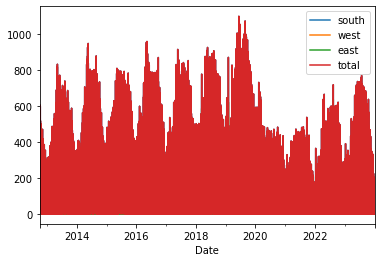

In [64]:
data.plot()
plt.show()

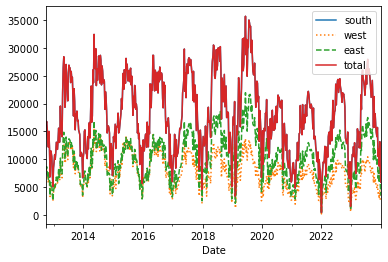

In [65]:
weekly = data.resample('W').sum()
weekly.plot(style=['-',':','--'])
plt.show()

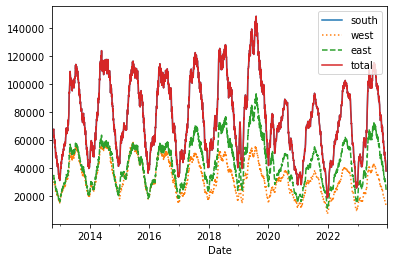

In [66]:
daily = data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=['-',':','--'])
plt.show()

In [77]:
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=['-',':','--'])
plt.show()

ImportError: Pandas requires version '1.8.1' or newer of 'scipy' (version '1.7.1' currently installed).

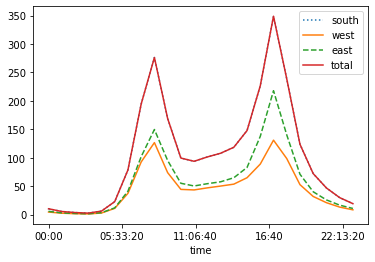

In [81]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(style=[':','-','--'])
plt.show()

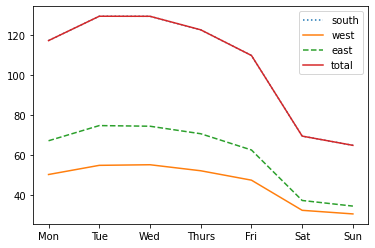

In [86]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','-','--'])
plt.show()

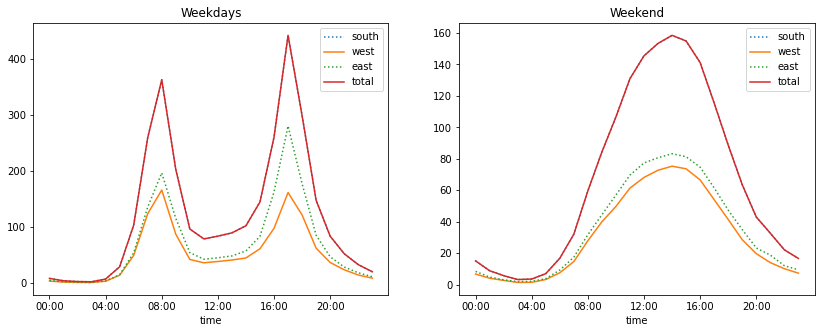

In [94]:
weekend = np.where(data.index.weekday<5,'Weekday','Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig,ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],title='Weekdays',
                          xticks=hourly_ticks,style=[':','-',':'])

by_time.loc['Weekend'].plot(ax=ax[1],title='Weekend',
                          xticks=hourly_ticks,style=[':','-',':'])

plt.show()